In [ ]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


#loading the data
path = 'C:/INTERN/practice/ERA_Sample_Data_from_Customer.xlsx'
dataset = pd.read_excel(path)

In [56]:
print("Shape:", dataset.shape)
print("\nColumns:\n", dataset.columns)
print("\nData Types:\n", dataset.dtypes)
dataset.head()


Shape: (123, 31)

Columns:
 Index(['region', 'district', 'VendorTransactionId', 'CustomerName',
       'AccountNo', 'MeterNumber', 'OperatorName', 'Tariff', 'TransactionNo',
       'CalendarYear', 'Month', 'PurchaseDate', 'TaxExcempt', 'Token',
       'CashTendered', 'CostOfEnergy', 'ServiceCharges', 'VAT', 'Units',
       'LifeLineUnits', 'CostLifeLineUnits', 'AboveLifeLineUnits',
       'CostAboveLifeLineUnits', 'CreditRefund', 'ArrearsAmount',
       'AdditionalCharge', 'AccountPayAmount', 'AccountSaveAmount',
       'ForexAdjustment', 'FuelAdjustment', 'InflationAdjustment'],
      dtype='object')

Data Types:
 region                            object
district                          object
VendorTransactionId               object
CustomerName                      object
AccountNo                          int64
MeterNumber                        int64
OperatorName                      object
Tariff                            object
TransactionNo                      int64
Calendar

,region,district,VendorTransactionId,CustomerName,AccountNo,MeterNumber,OperatorName,Tariff,TransactionNo,CalendarYear,...,AboveLifeLineUnits,CostAboveLifeLineUnits,CreditRefund,ArrearsAmount,AdditionalCharge,AccountPayAmount,AccountSaveAmount,ForexAdjustment,FuelAdjustment,InflationAdjustment
0,NORTH EAST,TORORO,31411113123,ANNET WERE,1020515,42418035,MTN - PREPAID,10.1 Domestic Prepayment,18671138,2025,...,5.1,3956.07,0,0,0,-77.44,19.48,0,0,0
1,NORTH EAST,IGANGA,APCUG166976732300864,BUYINZA BASIT,1020516,92101287,AIRTEL - PREPAID,10.1 Domestic Prepayment,18620623,2025,...,34.5,26761.65,0,0,0,-32.40,63.85,0,0,0
2,NORTH EAST,KITGUM,31401768294,CONSY OYELLA,1020517,92101288,MTN - PREPAID,10.1 Domestic Prepayment,18512022,2025,...,2.9,2249.53,0,0,0,-17.53,8.48,0,0,0
3,NORTH EAST,BOMBO,31398993248,BETTY NALUYIMAWALAKIRA,1020518,92101289,MTN - PREPAID,10.1 Domestic Prepayment,18456012,2025,...,1.7,1318.69,0,0,0,-7.80,61.95,0,0,0
4,NORTH EAST,BOMBO,APCUG166919364392704,WALLIAM LWANYAGA,1020519,92101290,AIRTEL - PREPAID,10.1 Domestic Prepayment,18426425,2025,...,0.0,0.00,0,0,0,-47.46,20.66,0,0,0


In [57]:
dataset.isnull().sum()

region                    0
district                  0
VendorTransactionId       0
CustomerName              0
AccountNo                 0
MeterNumber               0
OperatorName              0
Tariff                    0
TransactionNo             0
CalendarYear              0
Month                     0
PurchaseDate              0
TaxExcempt                0
Token                     0
CashTendered              0
CostOfEnergy              0
ServiceCharges            0
VAT                       0
Units                     0
LifeLineUnits             0
CostLifeLineUnits         0
AboveLifeLineUnits        0
CostAboveLifeLineUnits    0
CreditRefund              0
ArrearsAmount             0
AdditionalCharge          0
AccountPayAmount          0
AccountSaveAmount         0
ForexAdjustment           0
FuelAdjustment            0
InflationAdjustment       0
dtype: int64

In [58]:
dataset.describe()         # Summary of all number columns (like mean, min, max)


,AccountNo,MeterNumber,TransactionNo,CalendarYear,Month,PurchaseDate,CashTendered,CostOfEnergy,ServiceCharges,VAT,...,AboveLifeLineUnits,CostAboveLifeLineUnits,CreditRefund,ArrearsAmount,AdditionalCharge,AccountPayAmount,AccountSaveAmount,ForexAdjustment,FuelAdjustment,InflationAdjustment
count,1.230000e+02,1.230000e+02,1.230000e+02,123.0,123.0,123,123.000000,123.000000,123.000000,123.000000,...,123.000000,123.000000,123.0,123.000000,123.000000,123.000000,123.000000,123.0,123.0,123.0
mean,1.020576e+06,2.013223e+10,1.853700e+07,2025.0,3.0,2025-01-17 18:22:06.276422656,16307.422764,10897.385203,2731.707317,2482.739756,...,6.515447,4980.405285,0.0,35.365854,163.902439,-39.922276,36.244472,0.0,0.0,0.0
min,1.020515e+06,4.241804e+07,1.823332e+07,2025.0,3.0,2025-01-03 00:16:34,200.000000,25.000000,0.000000,27.930000,...,0.000000,0.000000,0.0,0.000000,0.000000,-90.610000,0.060000,0.0,0.0,0.0
25%,1.020546e+06,4.261250e+09,1.836641e+07,2025.0,3.0,2025-01-03 15:30:22,5000.000000,1787.500000,3360.000000,766.800000,...,0.000000,0.000000,0.0,0.000000,0.000000,-61.675000,15.825000,0.0,0.0,0.0
50%,1.020576e+06,4.264821e+09,1.853342e+07,2025.0,3.0,2025-01-03 21:42:50,10000.000000,5068.690000,3360.000000,1517.160000,...,0.700000,542.990000,0.0,0.000000,0.000000,-35.970000,27.900000,0.0,0.0,0.0
75%,1.020606e+06,1.438129e+10,1.869435e+07,2025.0,3.0,2025-02-03 15:22:54.500000,20000.000000,13394.145000,3360.000000,3013.545000,...,6.150000,4770.555000,0.0,0.000000,0.000000,-18.295000,55.730000,0.0,0.0,0.0
max,1.020637e+06,9.450058e+10,1.884708e+07,2025.0,3.0,2025-02-03 22:38:29,100000.000000,81420.000000,6720.000000,15260.400000,...,66.300000,42372.780000,0.0,3000.000000,3360.000000,-0.720000,90.620000,0.0,0.0,0.0
std,3.565109e+01,3.404151e+10,1.862604e+05,0.0,0.0,NaN,18148.773576,15360.550684,1629.649317,2768.714123,...,12.745922,9567.387859,0.0,295.716115,726.733805,25.774446,25.398984,0.0,0.0,0.0


CashTendered
10000     20
5000      13
9000      11
20000      8
4000       6
4500       5
6000       4
40000      4
15000      4
14000      3
50000      3
25000      3
8000       3
13000      2
33000      2
7000       2
30000      2
2000       2
4875       2
45000      2
27000      1
100000     1
11700      1
19000      1
44000      1
38000      1
12000      1
57000      1
19500      1
200        1
2400       1
6500       1
2500       1
9263       1
18500      1
98000      1
1800       1
16000      1
3200       1
47000      1
1000       1
96000      1
Name: count, dtype: int64


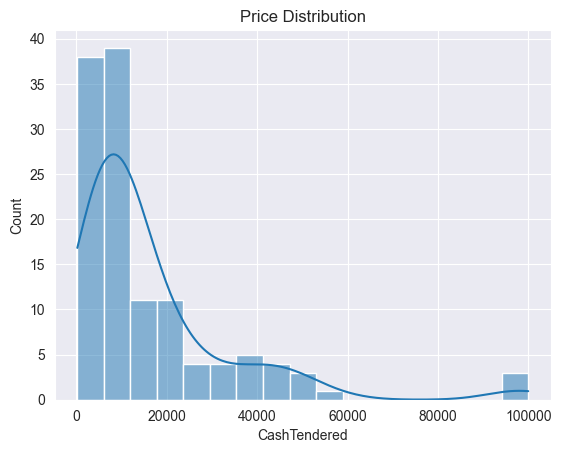

In [59]:
print(dataset.CashTendered.value_counts())
sns.histplot(dataset['CashTendered'], kde=True)
plt.title("Price Distribution")
plt.show()


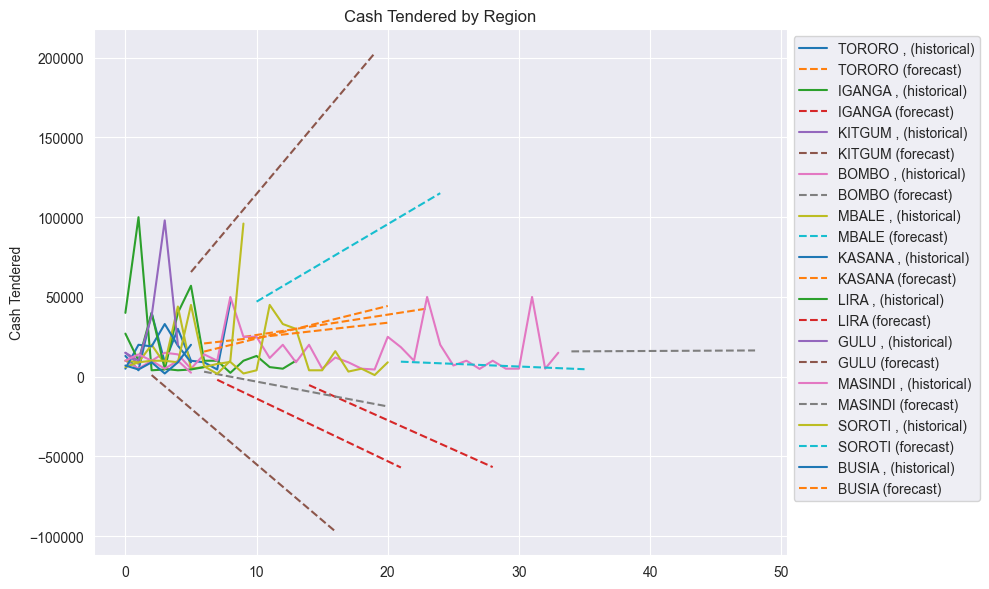

In [60]:
#plotting by over all the districts

data = dataset[['district', 'CashTendered']].dropna()

all_districts = data['district'].unique()

plt.figure(figsize=(10, 6))

for district in all_districts:
    district_data = data[data['district'] == district].reset_index(drop=True)
    y = district_data['CashTendered'].values
    x = np.arange(len(y)).reshape(-1, 1)

    if len(y) < 2:
        continue

    model = LinearRegression()
    model.fit(x, y)

    future_x = np.arange(len(y), len(y) + 15).reshape(-1, 1)
    future_y = model.predict(future_x)

    plt.plot(x, y, label=f"{district} , (historical)")
    plt.plot(future_x, future_y, '--', label=f"{district} (forecast)")

# 5. Final plot settings
plt.ylabel("Cash Tendered")
plt.title("Cash Tendered by Region")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


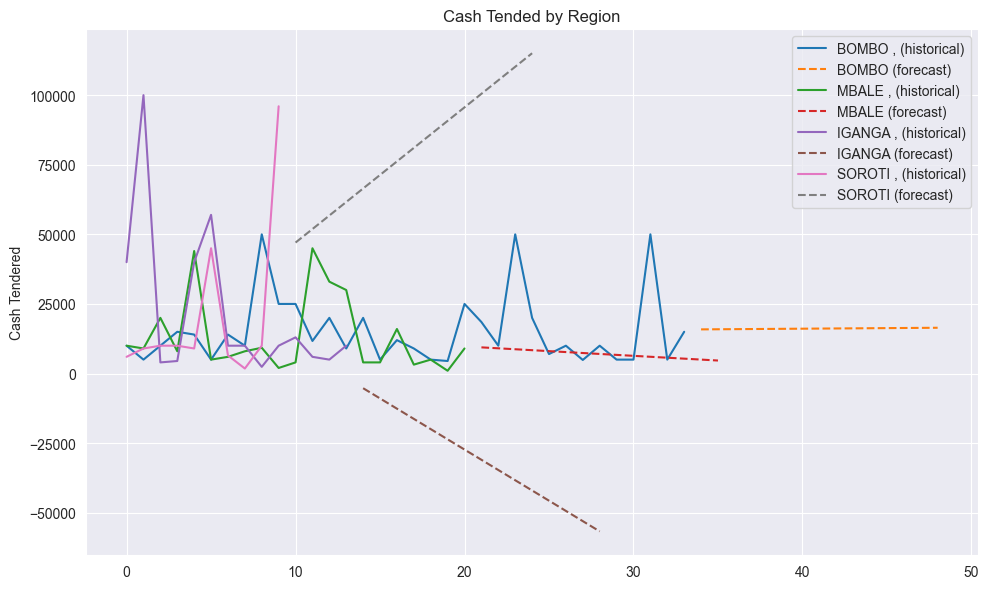

In [61]:

from sklearn.linear_model import LinearRegression
data = dataset[['district', 'CashTendered']].dropna()

top_districts = data['district'].value_counts().nlargest(4).index.tolist()

plt.figure(figsize=(10, 6))

for district in top_districts:
    district_data = data[data['district'] == district].reset_index(drop=True)
    y = district_data['CashTendered'].values
    x = np.arange(len(y)).reshape(-1, 1)

    model = LinearRegression()
    model.fit(x, y)

    future_x = np.arange(len(y), len(y) + 15).reshape(-1, 1)
    future_y = model.predict(future_x)

    plt.plot(x, y, label=f"{district} , (historical)")
    plt.plot(future_x, future_y, '--', label=f"{district} (forecast)")

plt.ylabel("Cash Tendered")
plt.title("Cash Tended by Region")
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
y = dataset.CashTendered
X = dataset.drop(['CashTendered'] , axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#cardinality
cat_cols = [cname for cname in X_train.columns
            if X_train[cname].nunique() < 10 and
            X_train[cname].dtype == 'object']

num_cols = [cname for cname in X_train.columns
            if X_train[cname].dtype in ['int64', 'float64']]


In [63]:
print("Cardinality colums = " , cat_cols)
print("Numerical columns = " , num_cols)

Cardinality colums =  ['region', 'OperatorName', 'Tariff', 'TaxExcempt']
Numerical columns =  ['AccountNo', 'MeterNumber', 'TransactionNo', 'CalendarYear', 'Month', 'CostOfEnergy', 'ServiceCharges', 'VAT', 'Units', 'LifeLineUnits', 'CostLifeLineUnits', 'AboveLifeLineUnits', 'CostAboveLifeLineUnits', 'CreditRefund', 'ArrearsAmount', 'AdditionalCharge', 'AccountPayAmount', 'AccountSaveAmount', 'ForexAdjustment', 'FuelAdjustment', 'InflationAdjustment']


In [64]:
#copying the data
my_cols = cat_cols + num_cols
X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()

In [65]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from  sklearn.compose import ColumnTransformer
#preprocessing for numericals data
numeric_transformer = SimpleImputer(strategy='constant')

#preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#preprocessing for all
preprocessor = ColumnTransformer(
    [ ('num', numeric_transformer, num_cols),
      ('cat', categorical_transformer, my_cols),]
)

In [66]:
model = RandomForestRegressor(n_estimators=10,random_state=42)

In [67]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)
                              ])
#fit the train data
my_pipeline.fit(X_train, y_train)
# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)

#evaluate
score = mean_absolute_error(y_test, preds)
print("Mean absolute error is ", score)

Mean absolute error is  1806.8
